# Groupby and apply
Powerful data query mechanisms
see '3.13 Grouping Rows by Values' in Albon

## Load a dataset

In [3]:
# !mamba install seaborn -y

In [5]:
import pandas as pd
import seaborn as sns
url="https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
# url="https://raw.githubusercontent.com/chrisalbon/simulated_datasets/master/titanic.csv"  #404 now
df = pd.read_csv(url)

In [6]:
#how many rows in DataFrame
print(len(df))

#look at first few
df.head()

891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Note that we have Sex and SexCode- SexCode is just a numeric representation of Sex

In [7]:
#lets see what type of data is in each column
df.dtypes

#This DataFrame has 3 numerical types(Age, Survived, and Sexcode) 
# and three object types (Name, PClass and Sex).
# The object type in this case is a string

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.nunique()

## 'Groupby' allows you to separate your data by some selector or combination of selectors and then apply a function over each of these groups to calculate a statistic.

The function will only apply to the fields where it makes sense (which means numerical data.)


## Lets see who survived based on Sex.  
I'm grouping all the rows by sex, and then adding up all the values in numerical fields

In [8]:
#this is a groupby object, you can't do anything with it until you apply a function to it
gb = df.groupby('Sex')
print(type(gb))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [13]:
#after applying a function to the groupby object you get a dataframe
df1=df.groupby('Sex').sum()
print(type(df1))
df1

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,135343,233,678,"Cumings, Mrs. John Bradley (Florence Briggs Th...",7286.00,218,204,PC 17599STON/O2. 3101282113803347742237736PP 9...,13966.6628,C85C123G6C103B78D33B28F33C23 C25 C27E101F E69D...,CSSSCSSSSSCQSSQCQSCSSCQQSCSSSSSSSQSSSSSSQCSCSS...
male,262043,109,1379,"Braund, Mr. Owen HarrisAllen, Mr. William Henr...",13919.17,248,136,A/5 2117137345033087717463349909A/5. 215134708...,14727.2865,E46D56A6C23 C25 C27B30C52C83F G73E31A5D10 D12D...,SSQSSSSQSSSSCSSCSCSCSCSQCSSCSCSCSSCCSSSSCSSSSS...


In [12]:
df2=df.groupby('Sex').sum().reset_index()
df2

,Sex,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,female,135343,233,678,"Cumings, Mrs. John Bradley (Florence Briggs Th...",7286.00,218,204,PC 17599STON/O2. 3101282113803347742237736PP 9...,13966.6628,C85C123G6C103B78D33B28F33C23 C25 C27E101F E69D...,CSSSCSSSSSCQSSQCQSCSSCQQSCSSSSSSSQSSSSSSQCSCSS...
1,male,262043,109,1379,"Braund, Mr. Owen HarrisAllen, Mr. William Henr...",13919.17,248,136,A/5 2117137345033087717463349909A/5. 215134708...,14727.2865,E46D56A6C23 C25 C27B30C52C83F G73E31A5D10 D12D...,SSQSSSSQSSSSCSSCSCSCSCSQCSSCSCSCSSCCSSSSCSSSSS...


In [7]:
# adding up Ages is not helpful, neither is SexCode, lets just see who survived
df1.Survived
# df1.iloc[:,1]  #same as above

Sex
female    308
male      142
Name: Survived, dtype: int64

In [8]:
# Note that this DataFrame has summary stats only, it's not hiding any of the other data
df1.shape

(2, 3)

In [9]:
df1.index
df1.loc['male']

Age         14514.71
Survived      142.00
SexCode         0.00
Name: male, dtype: float64

## Lets see who survived based on Sex and PClass.  

In [10]:
df.groupby(['Sex','PClass']).count()

Name  Age  Survived  SexCode
Sex    PClass                              
female 1st      143  101       143      143
       2nd      107   85       107      107
       3rd      212  102       212      212
male   *          1    0         1        1
       1st      179  125       179      179
       2nd      172  127       172      172
       3rd      499  216       499      499

In [11]:
#Note that the grouping has changed
df2=df.groupby(['Sex','PClass']).sum()
df2

# df2.iloc[:,1]

Age  Survived  SexCode
Sex    PClass                            
female 1st     3815.00       134      143
       2nd     2328.00        94      107
       3rd     2323.17        80      212
male   *          0.00         0        0
       1st     5149.92        59        0
       2nd     3671.63        25        0
       3rd     5693.16        58        0

In [12]:
#want to select just 1 row from above multiindexed dataframe?
#first need to know how to get the index, ask for it
df2.index

MultiIndex([('female', '1st'),
            ('female', '2nd'),
            ('female', '3rd'),
            (  'male',   '*'),
            (  'male', '1st'),
            (  'male', '2nd'),
            (  'male', '3rd')],
           names=['Sex', 'PClass'])

In [13]:
#to get the first row
df2.loc[[('female','1st')]]

,,Age,Survived,SexCode
Sex,PClass,,,
female,1st,3815.0,134,143


In [14]:
#what is that *?  Apparently it's a mistyped passenger class
#short any other info (were there other Jacobsons onboard?) it's hard to tell what his PClass is
df[df.PClass=='*']

,Name,PClass,Age,Sex,Survived,SexCode
456,Jacobsohn Mr Samuel,*,NaN,male,0,0


In [15]:
#start here 1/30/23

## You do not have to use the built in functions for groupby.  You can make your own.
Use groupby's apply() method, <mark>It takes a DataFrame and returns a DataFrame, or a Series or scaler

In [16]:
#lets find the oldest male and female
def fun1(df):
    #this function finds the oldest male and female passenger
    #sort by age, this returns a series with just age
    # return (df.Age.sort_values(ascending=False).iloc[0])

    #sort by age, return the name and age column
    return (df.sort_values(by='Age',ascending=False).iloc[0,[0,2]])


df.groupby('Sex').apply(fun1)

,Name,Age
Sex,,
female,"Crosby, Mrs Edward Gifford (Catherine Elizabet...",69.0
male,"Goldschmidt, Mr George B",71.0


In [17]:
#lets find the oldest male and female, who died and survived 
def fun1(df):
    #this function finds the oldest male and female passenger
    #sort by age, this returns a series with just age
    # return (df.Age.sort_values(ascending=False).iloc[0])

    #sort by age, return the name and age column
    return (df.sort_values(by='Age',ascending=False).iloc[0,[0,2]])


df1=df.groupby(['Sex','Survived']).apply(fun1)
df1

Name   Age
Sex    Survived                                                         
female 0                             Straus, Mrs Isidor (Ida Blun)  63.0
       1         Crosby, Mrs Edward Gifford (Catherine Elizabet...  69.0
male   0                                    Artagaveytia, Mr Ramon  71.0
       1                           Frolicher-Stehli, Mr Maxmillian  60.0

In [27]:
#what to use to dereference
df1.index

MultiIndex([('female', 0),
            ('female', 1),
            (  'male', 0),
            (  'male', 1)],
           names=['Sex', 'Survived'])

In [28]:
df1.query("Sex=='female' & Survived==0")
# df1.query("Survived==0")

,,Name,Age
Sex,Survived,,
female,0,"Straus, Mrs Isidor (Ida Blun)",63.0


## Does gender or passenger class affect your chances?

We want percentages here not absolute numbers, for instance number of femal 1st class passengers who survived divided by total number of female first class passengers.


In [18]:
#survival based on class
def fun3(df):
    #each dataframe passed to this function will contain 
    #all rows of 1 gender (M,F) in one of the PClasses (1st, 2nd, 3rd) 
    #just divide the len of the dataframe by the number who survived to see
    #survival rate
    return df.Survived.sum()/len(df)


res=df.groupby(['Sex','PClass']).apply(fun3)
res

Sex     PClass
female  1st       0.937063
        2nd       0.878505
        3rd       0.377358
male    *         0.000000
        1st       0.329609
        2nd       0.145349
        3rd       0.116232
dtype: float64

In [19]:
#can also do it this way
tmp=df.groupby(['Sex','PClass'])   #create a groupby object
tmp.sum().loc[:,'Survived']/tmp.count().SexCode  #divide total number survivors by total number

Sex     PClass
female  1st       0.937063
        2nd       0.878505
        3rd       0.377358
male    *         0.000000
        1st       0.329609
        2nd       0.145349
        3rd       0.116232
dtype: float64

In [20]:
type(tmp)

pandas.core.groupby.generic.DataFrameGroupBy

## I would like to graph this but my indexes are a pain, reset_index to the rescue!
It will create a dataframe from this Series and save the multiindex as columns

In [21]:
res1=res.reset_index()
res1

,Sex,PClass,0
0,female,1st,0.937063
1,female,2nd,0.878505
2,female,3rd,0.377358
3,male,*,0.000000
4,male,1st,0.329609
5,male,2nd,0.145349
6,male,3rd,0.116232


In [22]:
#get rid of that *
res1.drop([3],inplace=True)
res1

,Sex,PClass,0
0,female,1st,0.937063
1,female,2nd,0.878505
2,female,3rd,0.377358
4,male,1st,0.329609
5,male,2nd,0.145349
6,male,3rd,0.116232


In [23]:
res1 = res1.rename(columns = {0 : 'Survival rate %'})
res1['Survival rate %'] = res1['Survival rate %']*100
res1.columns
res1

,Sex,PClass,Survival rate %
0,female,1st,93.706294
1,female,2nd,87.850467
2,female,3rd,37.735849
4,male,1st,32.960894
5,male,2nd,14.534884
6,male,3rd,11.623246


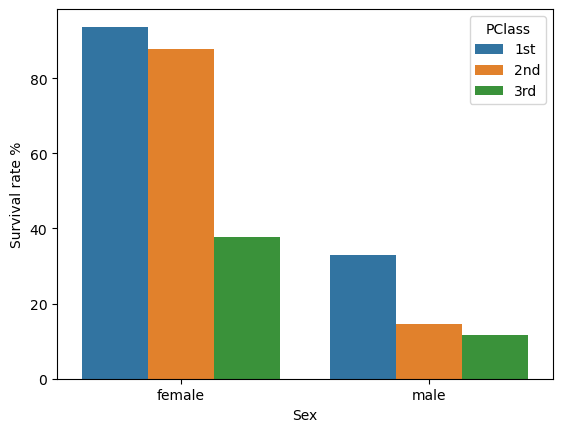

In [24]:
#lets graph this, oh no? what to do with the index?  And what I have is a series
sns.barplot(data=res1,x="Sex",y='Survival rate %',  hue="PClass" );